In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
from src.util import load_sentences, preprocess_sentences

### Load Datasets

In [3]:

base_path = 'datasets/conll2003/'
train_samples = load_sentences(base_path + 'train.txt')
val_samples = load_sentences(base_path + 'valid.txt')
test_samples = load_sentences(base_path + 'test.txt')

import pandas as pd

df_train = preprocess_sentences(train_samples)
df_val = preprocess_sentences(val_samples)
df_test = preprocess_sentences(test_samples)



### Label Absolute Frequency

<AxesSubplot:>

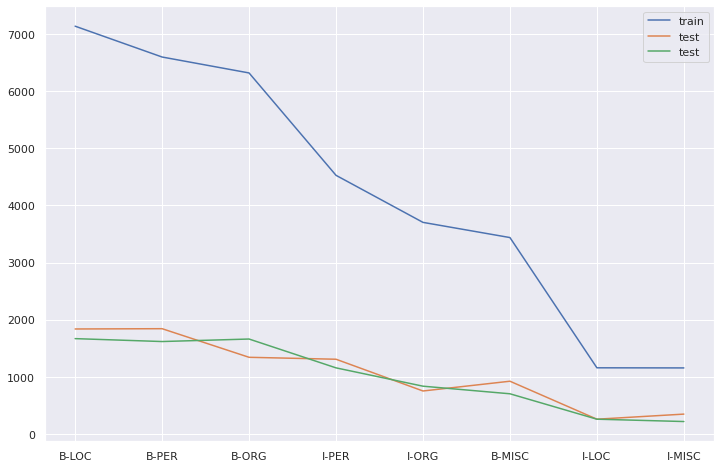

In [4]:
exclude_other = True
i_start = 1 if exclude_other else 0

pd.concat([df_train["labels"].value_counts()[i_start:].rename("train")
           , df_val["labels"].value_counts()[i_start:].rename("test")
           , df_test["labels"].value_counts()[i_start:].rename("test")
        ], axis=1, names=["1", "2"]).plot(figsize = (12,8))

### Label Relative Frequency

<AxesSubplot:>

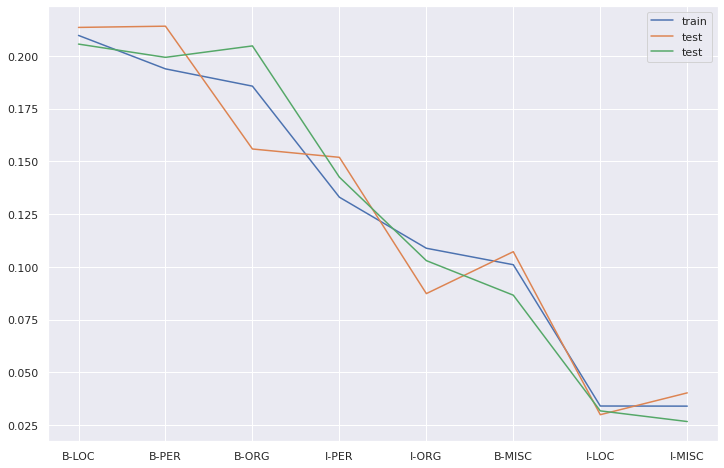

In [5]:

exclude_other = True
i_start = 1 if exclude_other else 0

pd.concat([(df_train["labels"].value_counts()[i_start:] / df_train["labels"].value_counts()[i_start:].sum()).rename("train")
            , (df_val["labels"].value_counts()[i_start:] / df_val["labels"].value_counts()[i_start:].sum()).rename("test")
            , (df_test["labels"].value_counts()[i_start:] / df_test["labels"].value_counts()[i_start:].sum()).rename("test")
        ], axis=1).plot(figsize = (12,8))


### Profiling Dataset (Training Set)

In [6]:
# !pip install pandas-profiling
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Profiling Dataset (Test Set)

In [8]:
pandas_profiling.ProfileReport(df_test)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]